In [66]:
import pandas as pd
import latent_calendar as lc
import matplotlib.pyplot as plt
# Import the data
actor_vial_df = pd.read_csv("data/actor_vial.csv")
vehiculos_df = pd.read_csv("data/vehiculos.csv")
siniestros_df = pd.read_csv("data/siniestros.csv")
hipothesis_df = pd.read_csv("data/hipothesis.csv")

In [67]:
# create dfs out of 2019 data

def make_date(df):
    df["datetime"] = pd.to_datetime(df["FECHA"], format="mixed")
    
def make_datetime(df):
    df["datetime"] = pd.to_datetime(df["FECHA"].str.cat(df["HORA"], sep=" "), format="mixed")

    
def clean_direccion(data):
     return " ".join(data.split()[:-1])
    


In [68]:
siniestros_df['DIRECCION_BASE'] = siniestros_df['DIRECCION'].apply(clean_direccion)
make_datetime(siniestros_df)


In [69]:
def add_siniestros_to_df(df):
    common_keys = ['CODIGO_ACCIDENTE','FECHA']
    merged_inner = pd.merge(left=df, 
                            right=siniestros_df, left_on=common_keys, right_on=common_keys)
    return merged_inner.loc[merged_inner["datetime"].between("2019-01-01","2020-01-01")]

In [70]:
siniestros_2019 = siniestros_df.loc[siniestros_df["datetime"].between("2019-01-01","2020-01-01")]

In [71]:
actor_vial_2019=add_siniestros_to_df(actor_vial_df)
vehiculos_2019 = add_siniestros_to_df(vehiculos_df)
hipothesis_2019 = add_siniestros_to_df(hipothesis_df)


In [227]:
siniestros_2019.head(n=3)

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,DIRECCION_BASE,datetime
138453,10471938,01/01/2019,00:00:00,3,1,1.0,NaN,CL 1A-TR 52ABIS 2,16,1,CL 1A-TR 52ABIS,2019-01-01 00:00:00
138454,10471904,01/01/2019,00:30:00,1,2,NaN,NaN,AV AVENIDA BOYACA-CL 60 S 05,19,1,AV AVENIDA BOYACA-CL 60 S,2019-01-01 00:30:00
138455,10471949,01/01/2019,00:30:00,3,1,1.0,NaN,CL 130D-KR 94 2,11,1,CL 130D-KR 94,2019-01-01 00:30:00


In [92]:
siniestros_2019.DIRECCION_BASE.describe()

count           34991
unique          18399
top       CL 13-KR 72
freq               58
Name: DIRECCION_BASE, dtype: object

<Axes: xlabel='EDAD'>

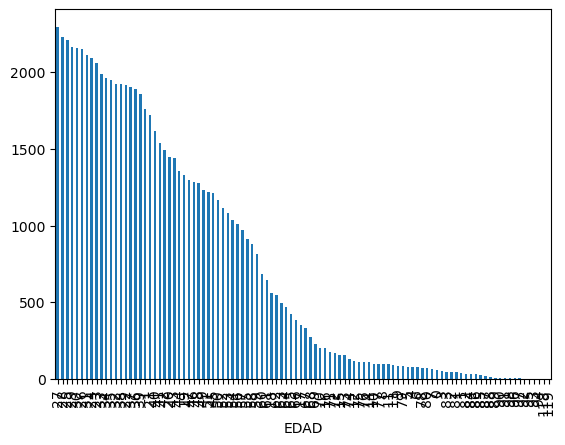

In [218]:
# fig, ax = pyplot.subplots()
(actor_vial_2019["EDAD"]).value_counts().plot(kind="bar")

<Axes: xlabel='EDAD'>

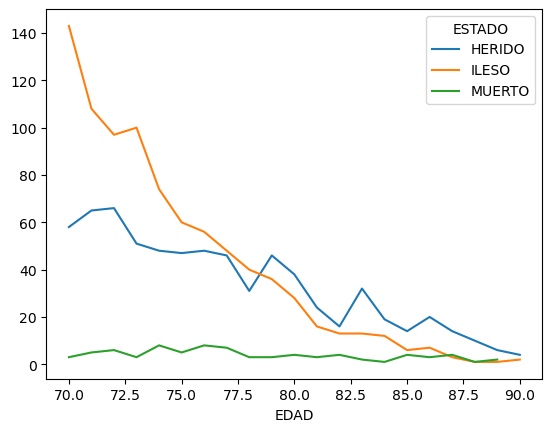

In [172]:
(
    actor_vial_2019.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)


In [143]:
# Change all si to -1
# actor_vial_2019['EDAD'] = actor_vial_2019['EDAD'].replace(to_replace='SIN INFORMACION', value='-1')
# actor_vial_2019['EDAD'] = actor_vial_2019['EDAD'].astype('int')




# Graph with incidents over time of day (2019)

In [229]:
import warnings
warnings.filterwarnings("ignore")
def latent_by_feature(df ,values: list ,feature_name: str) :
    for v in values:
        df_location = df.loc[df[feature_name] == v].cal.aggregate_events(feature_name, "datetime")
        model = lc.LatentCalendar(n_components=1, n_jobs=-1,)
        df_model = df_location.loc[df_location.sum(axis=1) > 0]
        model.fit(df_model)
        lc.plot.plot_model_components(model)
        plt.title(v)

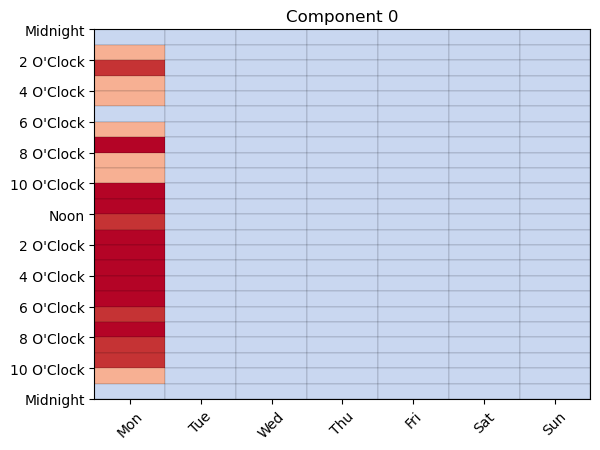

In [331]:
import warnings
warnings.filterwarnings("ignore")
test = siniestros_2019.loc[siniestros_2019["datetime"].between("2019-01-07","2019-01-08")]
test["anchor"] = 1
df_location = test.cal.aggregate_events("anchor", "datetime")

model = lc.LatentCalendar(n_components=1, n_jobs=-1, random_state=4)

df_model = df_location.loc[df_location.sum(axis=1) > 0]
model.fit(df_model)

lc.plot.plot_model_components(model)

# Siniestros por diseño lugar

<Axes: xlabel='DISENO_LUGAR'>

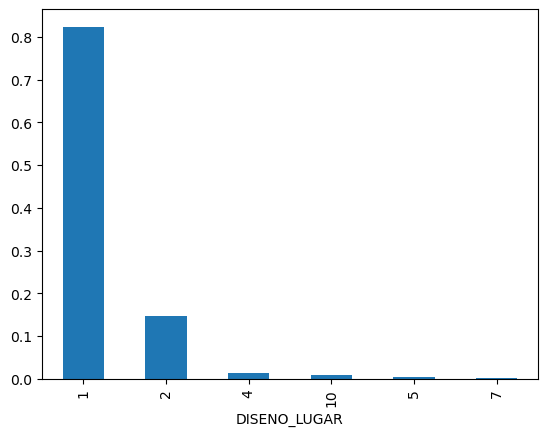

In [349]:
# for those who died
siniestros_2019.query("GRAVEDAD == 1").DISENO_LUGAR.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='DISENO_LUGAR'>

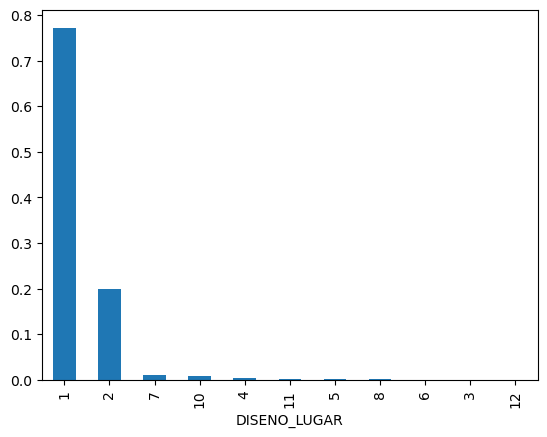

In [351]:
# in general
siniestros_2019.DISENO_LUGAR.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE'>

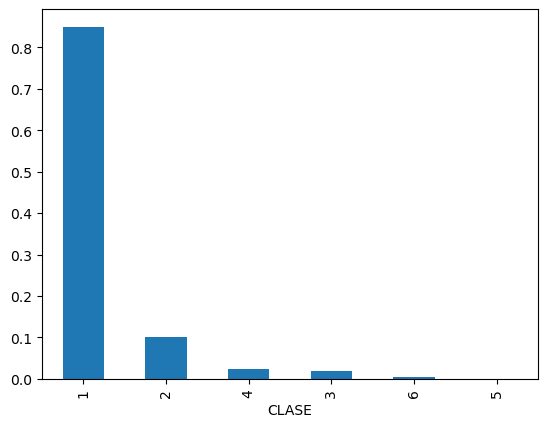

In [353]:
siniestros_2019.CLASE.value_counts(normalize=1).plot(kind='bar')

In [401]:
def clean_hora(data):
    return data.split(":")[0]
siniestros_2019['hour'] = siniestros_df['HORA'].apply(clean_hora)

<Axes: xlabel='hour'>

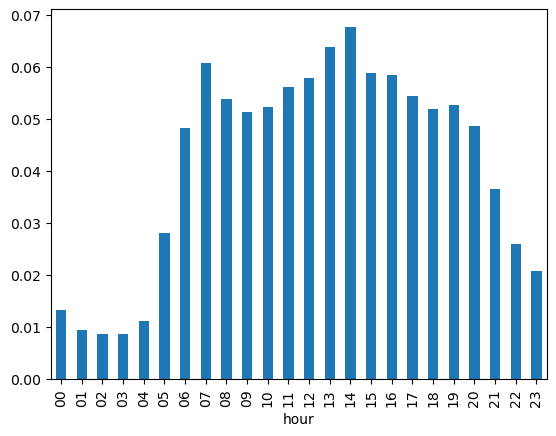

In [405]:
siniestros_2019.hour.value_counts(normalize=1).sort_index().plot(kind="bar")

In [413]:
siniestros_2019.query("GRAVEDAD == 1").hour.value_counts(normalize=1).describe()

count    24.000000
mean      0.041667
std       0.011927
min       0.018293
25%       0.037602
50%       0.041667
75%       0.045732
max       0.071138
Name: proportion, dtype: float64

<Axes: xlabel='hour'>

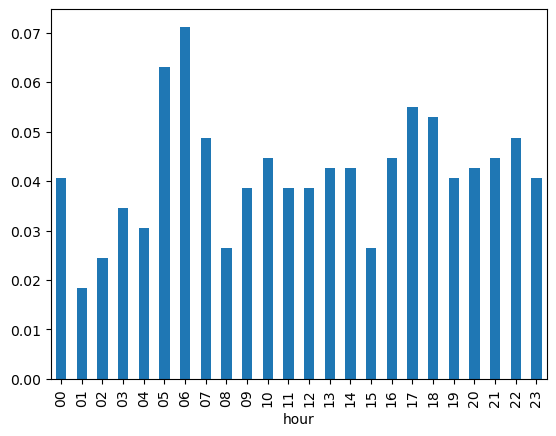

In [415]:
siniestros_2019.query("GRAVEDAD == 1").hour.value_counts(normalize=1).sort_index().plot(kind="bar")

<Axes: xlabel='hour'>

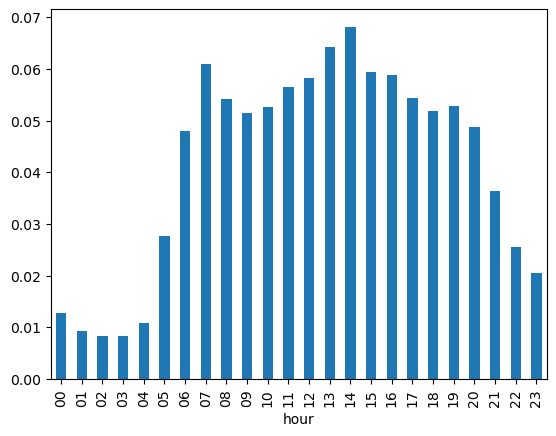

In [411]:
siniestros_2019.query("GRAVEDAD != 1").hour.value_counts(normalize=1).sort_index().plot(kind="bar")

<Axes: xlabel='OBJETO_FIJO'>

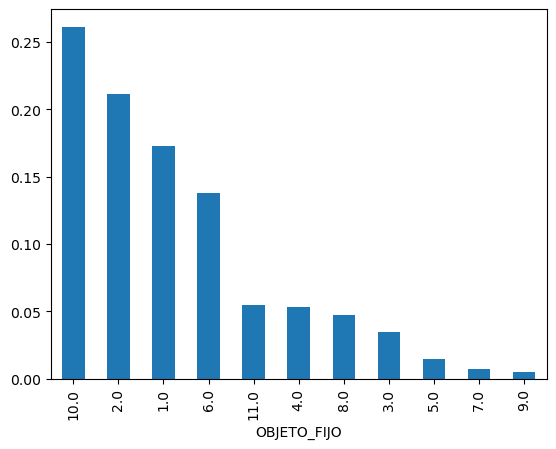

In [352]:
siniestros_2019.OBJETO_FIJO.value_counts(normalize=1).plot(kind='bar')

# Hypothisis

<Axes: xlabel='CODIGO_CAUSA'>

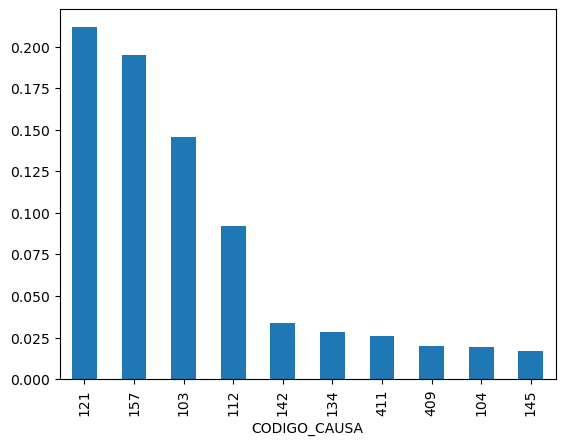

In [348]:
hipothesis_2019.CODIGO_CAUSA.value_counts(normalize=1)[0:10].plot(kind='bar')

# Vehiculos

In [371]:
vehiculos_2019.CLASE_x.value_counts(normalize=1)

CLASE_x
1.0     0.409911
10.0    0.151939
5.0     0.144060
2.0     0.095029
4.0     0.054740
13.0    0.041367
6.0     0.040520
7.0     0.024423
8.0     0.014220
3.0     0.013250
9.0     0.009911
28.0    0.000385
14.0    0.000185
17.0    0.000046
24.0    0.000015
Name: proportion, dtype: float64

<Axes: xlabel='CLASE_x'>

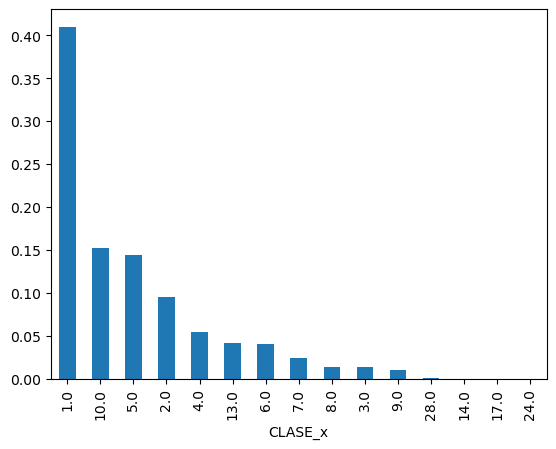

In [357]:
vehiculos_2019.CLASE_x.value_counts(normalize=1).plot(kind='bar')

In [372]:
vehiculos_2019.query("GRAVEDAD==1").CLASE_x.value_counts(normalize=1)

CLASE_x
10.0    0.376389
2.0     0.123611
1.0     0.120833
13.0    0.112500
5.0     0.068056
4.0     0.061111
8.0     0.040278
3.0     0.029167
7.0     0.026389
9.0     0.022222
6.0     0.016667
28.0    0.002778
Name: proportion, dtype: float64

<Axes: xlabel='CLASE_x'>

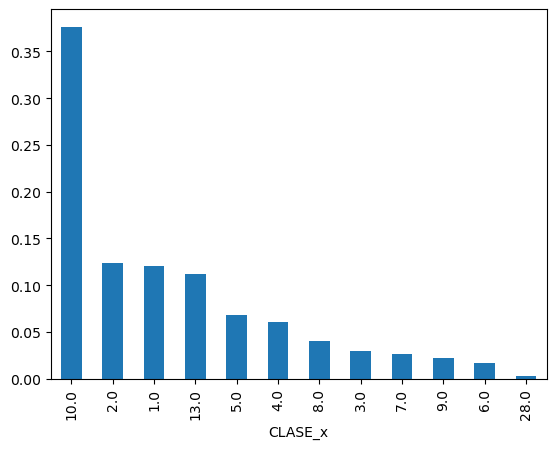

In [359]:
vehiculos_2019.query("GRAVEDAD==1").CLASE_x.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE_x'>

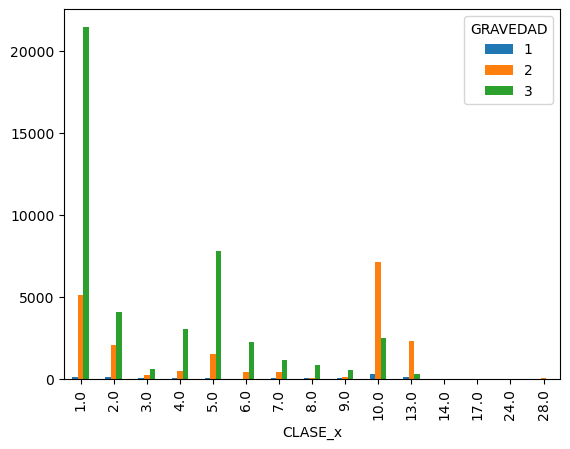

In [367]:
(
    vehiculos_2019#.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="CLASE_x"), "GRAVEDAD"])
    .size()
    .unstack()
    .plot(kind="bar")
)

# Actor Vial 

<Axes: xlabel='CONDICION'>

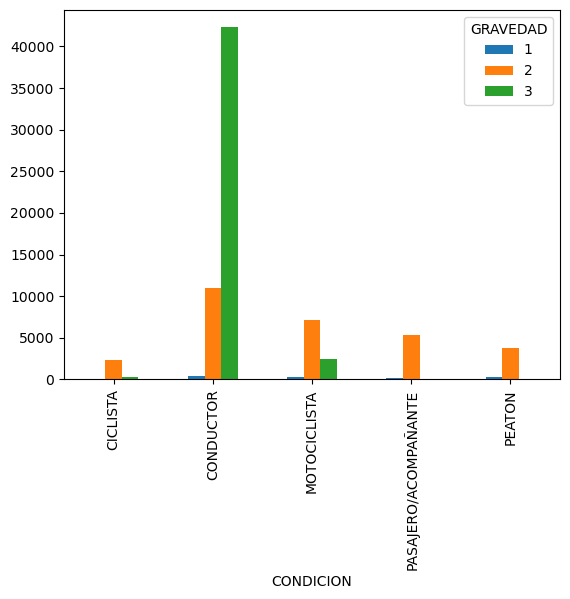

In [374]:
# note that pasajeros have nearly no uninjured people
(
    actor_vial_2019#.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="CONDICION"), "GRAVEDAD"])
    .size()
    .unstack()
    .plot(kind="bar")
)

<Axes: xlabel='EDAD'>

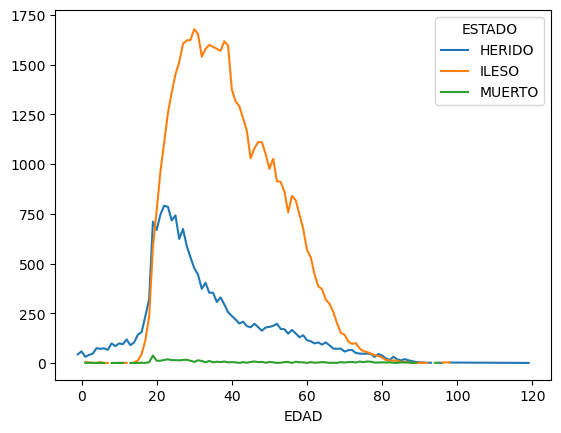

In [377]:
(
    actor_vial_2019# .query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

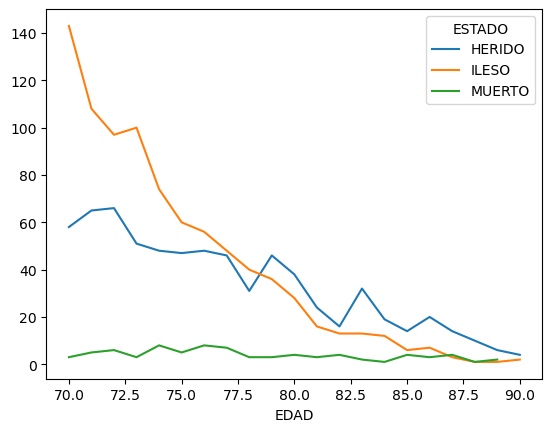

In [384]:
(
    actor_vial_2019.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

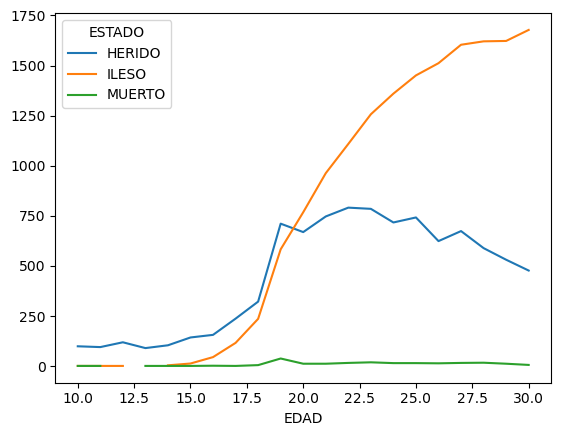

In [387]:
(
    actor_vial_2019.query("EDAD >=  10 and EDAD <= 30")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

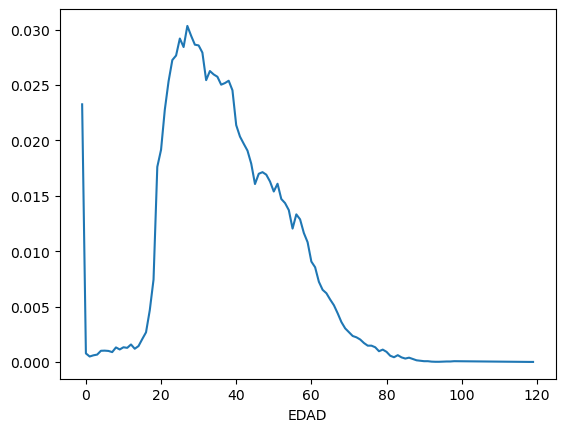

In [407]:
actor_vial_2019.EDAD.value_counts(normalize=1).sort_index().plot()
